In [77]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [90]:
env = gym.make('CarRacing-v2')
state, info = env.reset(seed=1)
state, r, done, _, _ = env.step([0,0,0])
state = state.mean(-1)/255

In [93]:
state[20,20]

0.5254901960784314

In [81]:
done = False
i = 0
while not done:
    state, r, done, _, _ = env.step(env.action_space.sample())
    i += 1
i

8356

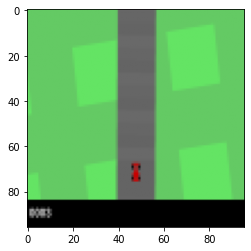

In [78]:
plt.imshow(state)

In [41]:
conv1 = nn.Conv2d(3, 8, 3, stride=2, padding=1)
conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=1)
conv3 = nn.Conv2d(16, 16, 3, stride=2, padding=1)
conv4 = nn.Conv2d(16, 32, 3, stride=2, padding=1)

In [42]:
x = F.relu(conv1(state.view(1, 3, 96, 96)))
x = F.relu(conv2(x))
x = F.relu(conv3(x))
x = F.relu(conv4(x))

x.view(1, -1).shape

torch.Size([1, 1152])